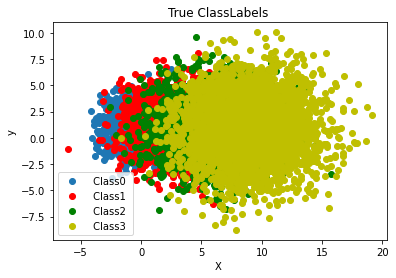

In [27]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

N = 10000
p = [.2,.25,.25,.3]
N_samples =[0, 0, 0, 0]
# assig nth e numberofsample s
for i in range(0, N):
    randnum = random.random()
    if randnum < p[0] :
        N_samples[0] = N_samples[0] + 1
    elif randnum < p[0] + p[1] :
        N_samples[1] = N_samples[1] + 1
    elif randnum < p[0] + p[1] + p[2] :
        N_samples[2] = N_samples[2] + 1
    else :
        N_samples[3] = N_samples[3] + 1
#cr e ateth e mus andsigma s
mu =[[ 0, 1],[3, 1],[6, 1],[9, 1]]
sigma =[[[2, 0],[0, 2]],[[ 4, 0],[0, 4]],[[ 6, 0],[0, 6]],[[ 8, 0],[0, 8]]]
r =[]
loss_matrix =[[ 0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]]
#cr e ate d atapoints in eac h distrib ution
for i in range(0, 4):
    r.append (np.random. multivariate_normal (mu[i], sigma [i], N_samples [i ]))
# plotdistrib ution s
plt.figure(0)
plt.scatter(r[0][:, 0], r[0][:, 1],label= ' Class0 ')
plt.scatter(r[1][:, 0], r[1][:, 1], c= 'r',label= ' Class1 ')
plt.scatter(r[2][:, 0], r[2][:, 1], c= 'g',label= ' Class2 ')
plt.scatter(r[3][:, 0], r[3][:, 1], c= 'y',label= ' Class3 ')
plt.legend()
plt.title('True ClassLabels ')
plt.xlabel('X ')
plt.ylabel('y')
plt.show()


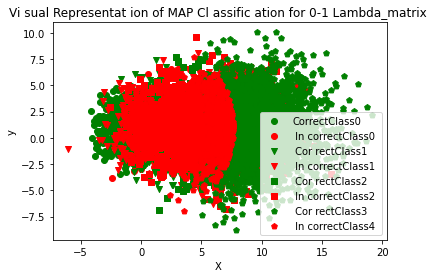

0.36648936831842077
[[0.8446007687889202, 0.15590300929257847, 0.0005045404831475031, 0.0], [0.20142734366057777, 0.5884216102210579, 0.19944479106549334, 0.011498805051489674], [0.029788979344890266, 0.24575907959534474, 0.408770994343772, 0.31650790553945907], [0.0022793870972730407, 0.05796155761637161, 0.22663620281457664, 0.7137737881746437]]


In [31]:
#cr e ate lambda_matrix
lambda_matrix =[[ 0, 1, 1, 1],[1, 0, 1, 1],[1, 1, 0, 1],[1, 1, 1, 0]]
plt.figure(1)
# get_risk :actsasth e ris k f u n ction R( aij x)r etu r nse xpe cte d ris k foragiv ensele ction, 
def get_risk(i, x, lambda_mat):
    total= 0
    for j in range(0, 4):
        total = total + lambda_mat[i][j] * p[j] * multivariate_normal.pdf(x, mu[j], sigma[j])
    return total
# get_MAP : makes d e cisio nsforalld atapoints inap rovid e d g aus sian distrib ution giv ena# listsof correctl y andin correctl y d e cid e dpoints
def get_MAP(gauss, lambda_matrix):
    correct=[]
    incorrect=[]
    for i in r[gauss] :
        choice = np.argmin([ get_risk(0,i, lambda_matrix), get_risk(1,i, lambda_matrix), get_risk(2,i,lambda_matrix), get_risk(3,i,lambda_matrix)])
        if choice == gauss :
            correct.append(i)
        else :
            incorrect.append(i)
        loss_matrix[gauss][choice] = loss_matrix[gauss][choice] + 1

    correct_xs=[]
    correct_ys=[]
    for i in correct:
        correct_xs.append(i[0 ])
        correct_ys.append(i[1 ])

    incorrect_xs=[]
    incorrect_ys=[]
    for i in incorrect:
        incorrect_xs.append(i[0 ])
        incorrect_ys.append(i[1 ])

    return [correct_xs, correct_ys],[incorrect_xs,incorrect_ys]

# plotsth e d ata foralldistrib ution s
correct,incorrect = get_MAP(0, lambda_matrix)

plt.scatter(correct[0], correct[1], c='g', marker='o',label='CorrectClass0')
plt.scatter(incorrect[ 0],incorrect[ 1], c= 'r', marker= 'o',label= ' In correctClass0 ')
correct,incorrect= get_MAP(1, lambda_matrix)
plt.scatter(correct[ 0], correct[ 1], c= 'g', marker= 'v',label= ' Cor rectClass1 ')
plt.scatter(incorrect[ 0],incorrect[ 1], c= 'r', marker= 'v',label= ' In correctClass1 ')
correct,incorrect= get_MAP(2, lambda_matrix)
plt.scatter(correct[ 0], correct[ 1], c= 'g', marker= 's',label= ' Cor rectClass2 ')
plt.scatter(incorrect[ 0],incorrect[ 1], c= 'r', marker= 's',label= ' In correctClass2 ')
correct,incorrect= get_MAP(3, lambda_matrix)
plt.scatter(correct[ 0], correct[ 1], c= 'g', marker= 'p',label= ' Cor rectClass3 ')
plt.scatter(incorrect[ 0],incorrect[ 1], c= 'r', marker= 'p',label= ' In correctClass4 ')
plt.legend()
plt.title('Vi sual Representat ion of MAP Cl assific ation for 0-1 Lambda_matrix ')
plt.xlabel('X ')
plt.ylabel('y')
plt.show()
# calculatetotal_lossfrom loss_matrix
total_loss= 0
for i in range(0, 4):
    for j in range(0, 4):
        if i != j :
            total_loss=total_loss+ loss_matrix [i][j]
print(total_loss/N)
# calculate con f u sio n matrix asr atios
for i in range(0, 4):
    loss_matrix [i] =[x / N_samples[i] for x in loss_matrix [i]]
print(loss_matrix)


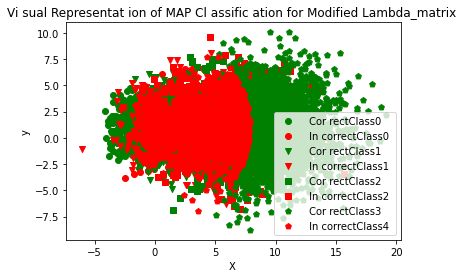

0.3734
[[0.8150201612903226, 0.18245967741935484, 0.0025201612903225806, 0.0], [0.1814580031695721, 0.5380348652931854, 0.27099841521394613, 0.009508716323296355], [0.02645721372467962, 0.20463001240181894, 0.48987184787102106, 0.27904092600248037], [0.0019524894240156199, 0.03839895867230719, 0.2743247640741946, 0.6853237878294826]]


In [34]:
# Pa rtB
#cr e ate new lambda_matrix
lambda_matrix_b =[[ 0, 1, 2, 3],[1, 0, 1, 2],[2, 1, 0, 1],[3, 2, 1, 0]]
loss_matrix =[[ 0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]]
# plotnew d ata us ing get_MAP f u n ctionabov e
plt.figure(2)
correct,incorrect= get_MAP(0, lambda_matrix_b)
plt.scatter(correct[ 0], correct[ 1], c= 'g', marker= 'o',label= ' Cor rectClass0 ')
plt.scatter(incorrect[ 0],incorrect[ 1], c= 'r', marker= 'o',label= ' In correctClass0 ')
correct,incorrect= get_MAP(1, lambda_matrix_b)
plt.scatter(correct[ 0], correct[ 1], c= 'g', marker= 'v',label= ' Cor rectClass1 ')
plt.scatter(incorrect[ 0],incorrect[ 1], c= 'r', marker= 'v',label= ' In correctClass1 ')
correct,incorrect= get_MAP(2, lambda_matrix_b)
plt.scatter(correct[ 0], correct[ 1], c= 'g', marker= 's',label= ' Cor rectClass2 ')
plt.scatter(incorrect[ 0],incorrect[ 1], c= 'r', marker= 's',label= ' In correctClass2 ')
correct,incorrect= get_MAP(3, lambda_matrix_b)
plt.scatter(correct[ 0], correct[ 1], c= 'g', marker= 'p',label= ' Cor rectClass3 ')

plt.scatter(incorrect[ 0],incorrect[ 1], c= 'r', marker= 'p',label= ' In correctClass4 ')
plt.legend()
plt.title('Vi sual Representat ion of MAP Cl assific ation for Modified Lambda_matrix ')
plt.xlabel('X ')
plt.ylabel('y')
plt.show()
# calculatetotallos s
total_loss= 0
for i in range(0, 4):
        for j in range(0, 4):
            if i != j :
                total_loss=total_loss+ loss_matrix [i][j]
print(total_loss/N)
# calculate con f u sio n matrix from lossmatr ix
for i in range(0, 4):
    loss_matrix [i] =[x / N_samples [i] for x in loss_matrix [i]]
print(loss_matrix)



